# Fetch Rewards Coding Challenge

## First: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [239]:
def find_nan(df):
  print("Total Rows: ", len(df))
  nan_columns = []
  nan_rows = df[df.isnull().any(axis=1)]

  # Print the rows with NaN values
  print("Rows with NaN values: ", len(nan_rows))
  for column in df.columns:
    nan_count = df[column].isnull().sum()

    print(f"Number of NaN values in '{column}' column: {nan_count}")

    if nan_count > 0:
        #nan_rows = df[df[column].isnull()]
        nan_columns.append(column)
        #print(f"Rows with NaN values in '{column}' column:\n{nan_rows}\n")

  nan_counts = df.isnull().sum()
  nan_counts = nan_counts[nan_counts > 0]

  # Plotting the NaN counts
  plt.figure(figsize=(10, 6))
  nan_counts.plot(kind='bar')
  plt.title('Number of NaN Values in Each Column')
  plt.xlabel('Columns')
  plt.ylabel('Count of NaN Values')
  plt.xticks(rotation=45)
  plt.grid(axis='y')

  # Display the plot
  plt.show()
  return len(df), len(nan_rows), nan_columns

In [149]:
def find_duplicates(df):
    print("Number of rows:", len(df))
    has_duplicates = df.duplicated().any()
    print("Any duplicate rows:", has_duplicates)

    # Count of duplicate rows
    duplicate_counts = df.duplicated().sum()
    print("Number of duplicate rows:", duplicate_counts)
    return duplicate_counts

In [195]:
data = {}

### Users Json File Preprocessing

Reading the file

In [278]:
users = pd.read_json('users.json', lines=True)
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


##### Finding NaN values

Total Rows:  495
Rows with NaN values:  131
Number of NaN values in '_id' column: 0
Number of NaN values in 'active' column: 0
Number of NaN values in 'createdDate' column: 0
Number of NaN values in 'lastLogin' column: 62
Number of NaN values in 'role' column: 0
Number of NaN values in 'signUpSource' column: 48
Number of NaN values in 'state' column: 56


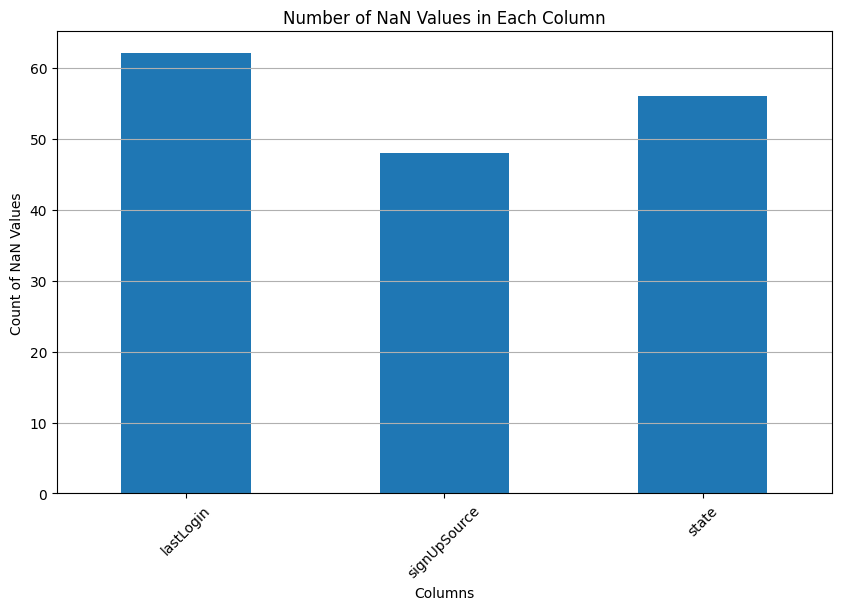

In [279]:
users_rows, users_nan_rows, users_missing_columns = find_nan(users)

In [280]:
users_dict = {}
users_dict['rows'] = users_rows
users_dict['nan_rows'] = users_nan_rows
users_dict['missing_columns'] = users_missing_columns

In [281]:
users = users.where(pd.notnull(users), None)

In [282]:
users['_id'] = users['_id'].apply(lambda x: x['$oid'])
users['createdDate'] = users['createdDate'].apply(lambda x: x['$date'])
users['createdDate'] = pd.to_datetime(users['createdDate'], unit='ms')
users['lastLogin'] = users['lastLogin'].apply(lambda x: x['$date'] if x is not None else None)
users['lastLogin'] = pd.to_datetime(users['lastLogin'], unit='ms')

In [283]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.554,2021-01-03 15:25:30.596999936,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI


Finding redundant rows

In [284]:
users_duplicate_rows = find_duplicates(users)

Number of rows: 495
Any duplicate rows: True
Number of duplicate rows: 283


In [285]:
users_dict['duplicate_rows'] = users_duplicate_rows
users_dict['unique_rows'] = users_rows - users_duplicate_rows

In [286]:
users.drop_duplicates(inplace=True)

Total Rows:  212
Rows with NaN values:  47
Number of NaN values in '_id' column: 0
Number of NaN values in 'active' column: 0
Number of NaN values in 'createdDate' column: 0
Number of NaN values in 'lastLogin' column: 40
Number of NaN values in 'role' column: 0
Number of NaN values in 'signUpSource' column: 5
Number of NaN values in 'state' column: 6


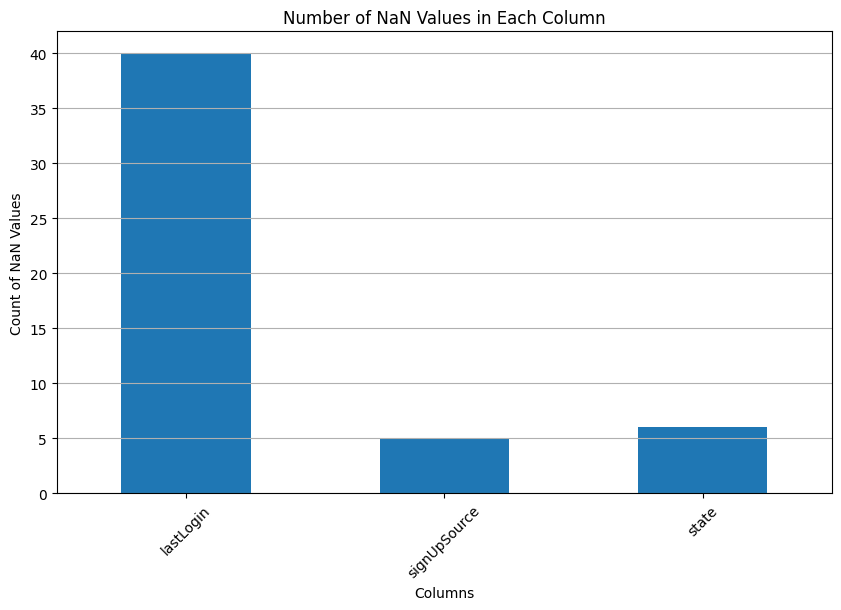

In [287]:
users_rows, user_nan_rows, users_missing_columns = find_nan(users)

In [288]:
data['users'] = users_dict

In [253]:
data

{'users': {'rows': 495,
  'nan_rows': 6,
  'missing_columns': ['lastLogin', 'signUpSource', 'state'],
  'duplicate_rows': 283,
  'unique_rows': 212},
 'brands': {'rows': 1167,
  'nan_rows': 234,
  'missing_columns': ['category', 'categoryCode', 'topBrand', 'brandCode'],
  'duplicate_rows': 0,
  'unique_rows': 1167},
 'receipts': {'rows': 1119,
  'nan_rows': 435,
  'missing_columns': ['bonusPointsEarned',
   'bonusPointsEarnedReason',
   'finishedDate',
   'pointsAwardedDate',
   'pointsEarned',
   'purchaseDate',
   'purchasedItemCount',
   'rewardsReceiptItemList',
   'totalSpent'],
  'duplicate_rows': 0,
  'unique_rows': 1119}}

### Brands Preprocesing

In [254]:
brands = pd.read_json('brands.json', lines=True)
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


Total Rows:  1167
Rows with NaN values:  912
Number of NaN values in '_id' column: 0
Number of NaN values in 'barcode' column: 0
Number of NaN values in 'category' column: 155
Number of NaN values in 'categoryCode' column: 650
Number of NaN values in 'cpg' column: 0
Number of NaN values in 'name' column: 0
Number of NaN values in 'topBrand' column: 612
Number of NaN values in 'brandCode' column: 234


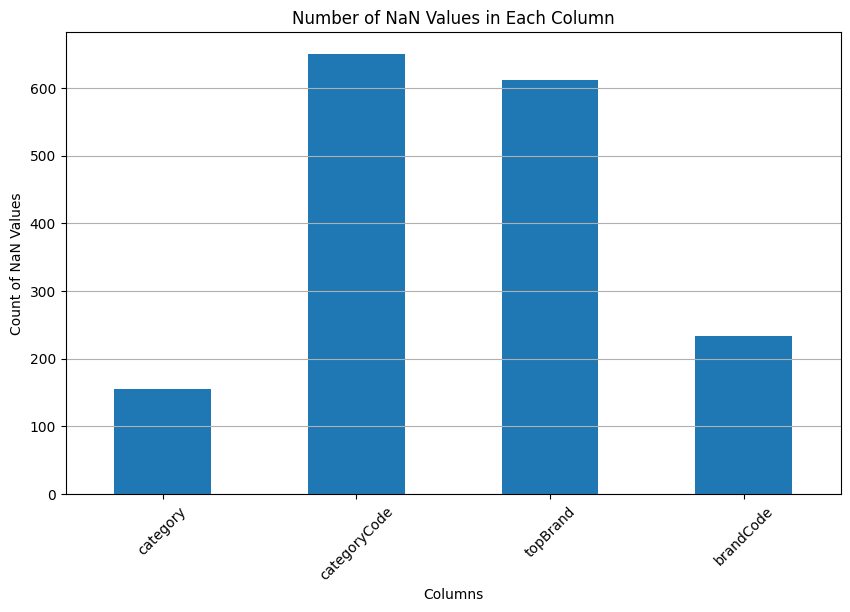

In [255]:
brands_rows, brands_nan_rows, brands_missing_columns  = find_nan(brands)

In [256]:
brands_dict = {}
brands_dict['rows'] = brands_rows
brands_dict['nan_rows'] = brands_nan_rows
brands_dict['missing_columns'] = brands_missing_columns

In [257]:
brands = brands.where(pd.notnull(brands), None)

In [258]:
brands['_id'] = brands['_id'].apply(lambda x: x['$oid'])
brands['cpg_id'] = brands['cpg'].apply(lambda x: x['$id']['$oid'] if x is not None else None)
brands['cpg_ref'] = brands['cpg'].apply(lambda x: x['$ref'] if x is not None else None)
brands.drop(columns=['cpg'], inplace=True)

In [259]:
brands.head()

,_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_id,cpg_ref
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,None,601ac114be37ce2ead437550,Cogs
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,5332f5fbe4b03c9a25efd0ba,Cogs
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559,Cogs
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559,Cogs
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7,Cogs


In [260]:
brands_duplicate_rows = find_duplicates(brands)

Number of rows: 1167
Any duplicate rows: False
Number of duplicate rows: 0


In [261]:
brands_dict['duplicate_rows'] = brands_duplicate_rows
brands_dict['unique_rows'] = brands_rows - brands_duplicate_rows

In [262]:
data['brands'] = brands_dict

### Receipts File Preprocessing

In [358]:
receipts = pd.read_json('receipts.json', lines=True)
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


Total Rows:  1119
Rows with NaN values:  665
Number of NaN values in '_id' column: 0
Number of NaN values in 'bonusPointsEarned' column: 575
Number of NaN values in 'bonusPointsEarnedReason' column: 575
Number of NaN values in 'createDate' column: 0
Number of NaN values in 'dateScanned' column: 0
Number of NaN values in 'finishedDate' column: 551
Number of NaN values in 'modifyDate' column: 0
Number of NaN values in 'pointsAwardedDate' column: 582
Number of NaN values in 'pointsEarned' column: 510
Number of NaN values in 'purchaseDate' column: 448
Number of NaN values in 'purchasedItemCount' column: 484
Number of NaN values in 'rewardsReceiptItemList' column: 440
Number of NaN values in 'rewardsReceiptStatus' column: 0
Number of NaN values in 'totalSpent' column: 435
Number of NaN values in 'userId' column: 0


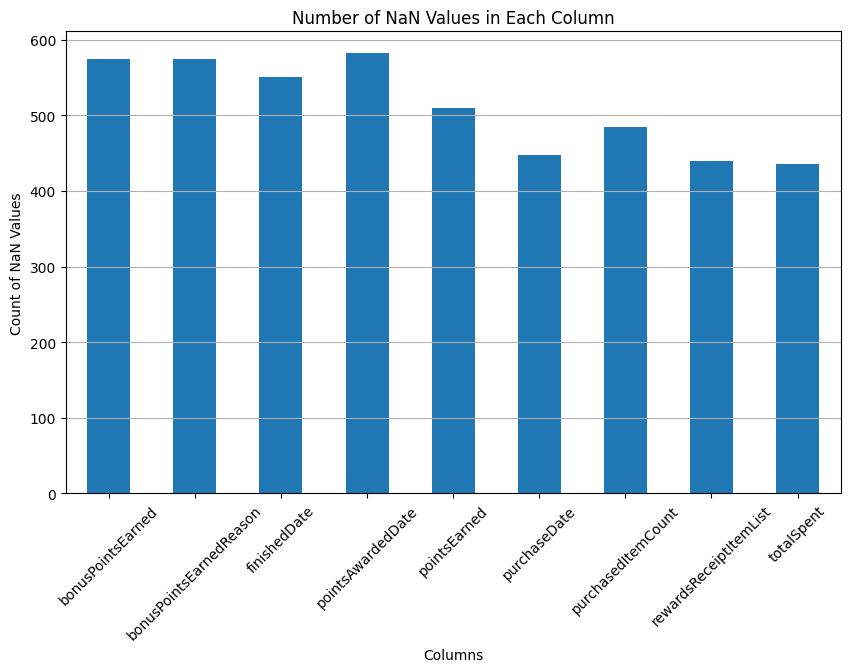

In [359]:
receipts_rows, receipts_nan_rows, receipts_missing_columns  = find_nan(receipts)

In [360]:
receipts_dict = {}
receipts_dict['rows'] = receipts_rows
receipts_dict['nan_rows'] = receipts_nan_rows
receipts_dict['missing_columns'] = receipts_missing_columns

In [361]:
receipts = receipts.where(pd.notnull(receipts), None)

In [362]:
receipts['_id'] = receipts['_id'].apply(lambda x: x['$oid'])

In [363]:
receipts['createDate'] = receipts['createDate'].apply(lambda x: x['$date'] if x is not None else None)
receipts['createDate'] = pd.to_datetime(receipts['createDate'], unit='ms')
receipts['dateScanned'] = receipts['dateScanned'].apply(lambda x: x['$date'] if x is not None else None)
receipts['dateScanned'] = pd.to_datetime(receipts['dateScanned'], unit='ms')
receipts['finishedDate'] = receipts['finishedDate'].apply(lambda x: x['$date'] if x is not None else None)
receipts['finishedDate'] = pd.to_datetime(receipts['finishedDate'], unit='ms')
receipts['modifyDate'] = receipts['modifyDate'].apply(lambda x: x['$date'] if x is not None else None)
receipts['modifyDate'] = pd.to_datetime(receipts['modifyDate'], unit='ms')
receipts['pointsAwardedDate'] = receipts['pointsAwardedDate'].apply(lambda x: x['$date'] if x is not None else None)
receipts['pointsAwardedDate'] = pd.to_datetime(receipts['pointsAwardedDate'], unit='ms')
receipts['purchaseDate'] = receipts['purchaseDate'].apply(lambda x: x['$date'] if x is not None else None)
receipts['purchaseDate'] = pd.to_datetime(receipts['purchaseDate'], unit='ms')

In [364]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [371]:
items_list = []
for index, row in receipts.iterrows():
    if (row['rewardsReceiptItemList']):
        for item in row['rewardsReceiptItemList']:
            item_entry = item.copy()
            #print(item_entry)

            if 'brandCode' in item_entry:
                #print(item_entry)

                print(item_entry['brandCode'])
                item_entry['brandCode'] = item_entry['brandCode']
            else:
                item_entry['brandCode'] = None
            item_entry['receipt_id'] = row['_id']
            items_list.append(item_entry)

MISSION
BRAND
KRAFT EASY CHEESE
PEPSI
DORITOS
KLEENEX
WINGSTOP
WINGSTOP
BRAND
BRAND
BRAND
BRAND
BRAND
WINGSTOP
WINGSTOP
BRAND
WINGSTOP
BRAND
BRAND
WINGSTOP
WINGSTOP
WINGSTOP
MISSION
BRAND
WINGSTOP
GERM-X
BEN AND JERRYS
KLEENEX
BORDEN
KLEENEX
BEN AND JERRYS
BEN AND JERRYS
BORDEN
KNORR
BEN AND JERRYS
BEN AND JERRYS
BEN AND JERRYS
BEN AND JERRYS
BORDEN
KLEENEX
KLARBRUNN
BEN AND JERRYS
BRAND
HY-VEE
HY-VEE
LIGHT & FIT GREEK
HY-VEE
HY-VEE
CONNIE'S PIZZA
VAN DE KAMP'S
HATCH FARMS
HY-VEE
HY-VEE
KELLOGG'S
TEMPTATIONS
NATURE'S PATH ORGANIC
HY-VEE
DOLE
HY-VEE
HY-VEE
LIGHT & FIT GREEK
HY-VEE
HY-VEE
HY-VEE
EL MONTEREY
BIGELOW
HY-VEE
HY-VEE
HY-VEE SELECT
KIKKOMAN
SPECIAL K
SWANSON
YUBAN
HILLSHIRE FARM
HY-VEE
HY-VEE
JUST BARE
LAURA'S LEAN BEEF
CAL-ORGANIC FARMS
DOLE CHILLED FRUIT JUICES
DOLE
HY-VEE
HY-VEE
HY-VEE
HY-VEE
HY-VEE
HY-VEE
BUSH'S BEST
BUSH'S BEST
FOLGERS
HY-VEE
HY-VEE
HY-VEE
HY-VEE
KASHI
KASHI
LIPTON
NATURE'S PATH ORGANIC
HILLSHIRE FARM
HY-VEE
JUST BARE
KRAFT
LAURA'S LEAN BEEF
GREEN GIANT
H

In [372]:
items = pd.DataFrame(items_list)

array([None, 'MISSION', 'BRAND', 'KRAFT EASY CHEESE', 'PEPSI', 'DORITOS',
       'KLEENEX', 'WINGSTOP', 'GERM-X', 'BEN AND JERRYS', 'BORDEN',
       'KNORR', 'KLARBRUNN', 'HY-VEE', 'LIGHT & FIT GREEK',
       "CONNIE'S PIZZA", "VAN DE KAMP'S", 'HATCH FARMS', "KELLOGG'S",
       'TEMPTATIONS', "NATURE'S PATH ORGANIC", 'DOLE', 'EL MONTEREY',
       'BIGELOW', 'HY-VEE SELECT', 'KIKKOMAN', 'SPECIAL K', 'SWANSON',
       'YUBAN', 'HILLSHIRE FARM', 'JUST BARE', "LAURA'S LEAN BEEF",
       'CAL-ORGANIC FARMS', 'DOLE CHILLED FRUIT JUICES', "BUSH'S BEST",
       'FOLGERS', 'KASHI', 'LIPTON', 'KRAFT', 'GREEN GIANT',
       'HARVEST SNAPS', "THAT'S SMART!", 'TOSTITOS', 'ADVIL',
       'CHICKEN OF THE SEA', 'RICE-A-RONI', 'STARKIST', 'TIC TAC',
       'SO DELICIOUS', 'WONDERFUL', 'LIGHT & FIT', 'HANOVER',
       'HIDDEN VALLEY', 'DANNON', 'KETTLE BRAND', 'FAGE', 'ORAL-B GLIDE',
       "CAMPBELL'S", "FRENCH'S", 'CRISPIX', 'KING ARTHUR FLOUR',
       'KITCHEN BASICS', 'MCCORMICK', 'OLD EL PASO', 'PE

In [373]:
items.head()

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
receipts_duplicate_rows = find_duplicates(brands)

Number of rows: 1167
Any duplicate rows: False
Number of duplicate rows: 0


In [307]:
receipts.drop(columns=['rewardsReceiptItemList'], inplace=True)

In [271]:
receipts_dict['duplicate_rows'] = receipts_duplicate_rows
receipts_dict['unique_rows'] = receipts_rows - receipts_duplicate_rows

In [272]:
data['receipts'] = receipts_dict

#### Insights

- There are missing entries in all the 3 unstructured data.
- Users
  - There are redundant users in the users.json file.
  - There are missing entries for lastLogin, SignUpSource, state.
  - Out of 212 unique users 42 have missing values.
  - We can update the lastLogin with the created date.
- Brands
  - Have Missing Category Code, Category, topBrand, BrandCode.
  - Out of 1167 entries 912 contain missing values.
  - Missing values of BrandCode is to be resolved to make the system better.
- Receipts
  - Out of 1119 rows 665 rows have NaN values.
  - Missing columns are bonusPointsEarned, bonusPointsEarnedReason, finishedDate, pointsAwardedDate, pointsEarned, purchaseDate, purchasedItemCount, rewardsReceiptItemList, totalSpent.
  - This has significant number of missing attributes.
- Items
  - Created another table items, that contain the items and corresponding receipt number, I have removed the items from the receipts and created new table for ease of use.

In [289]:
print(data)

{'users': {'rows': 495, 'nan_rows': 131, 'missing_columns': ['lastLogin', 'signUpSource', 'state'], 'duplicate_rows': 283, 'unique_rows': 212}, 'brands': {'rows': 1167, 'nan_rows': 912, 'missing_columns': ['category', 'categoryCode', 'topBrand', 'brandCode'], 'duplicate_rows': 0, 'unique_rows': 1167}, 'receipts': {'rows': 1119, 'nan_rows': 665, 'missing_columns': ['bonusPointsEarned', 'bonusPointsEarnedReason', 'finishedDate', 'pointsAwardedDate', 'pointsEarned', 'purchaseDate', 'purchasedItemCount', 'rewardsReceiptItemList', 'totalSpent'], 'duplicate_rows': 0, 'unique_rows': 1119}}


### Relationship

We have Users, Brands, Receipts and Items tables.

- All the users in the receipts should be present in Users.
- All the Brands listed in the receipts should be present in Brands table.

Let us verify the same

#### Users

In [316]:
missing_user_ids = receipts[~receipts['userId'].isin(users['_id'])]['userId'].unique()

# Print the missing userIds
print("count of userIds in receipts that are not in users:")
print(len(missing_user_ids))

count of userIds in receipts that are not in users:
117


In [317]:
receipts['is_valid_user'] = receipts['userId'].isin(users['_id'])

# Count the number of valid and invalid userIds
valid_user_count = receipts['is_valid_user'].sum()
invalid_user_count = (~receipts['is_valid_user']).sum()

In [318]:
# Print the counts
print(f"Number of rows with valid userIds: {valid_user_count}")
print(f"Number of rows with invalid userIds: {invalid_user_count}")

Number of rows with valid userIds: 971
Number of rows with invalid userIds: 148


This is a problem as there are users present in receipts who are not present in the users table, this is an ambiguity.

#### Brands

In [315]:
missing_brands_barcode = items[~items['barcode'].isin(brands['barcode'])]['barcode'].unique()

# Print the missing userIds
print("count of barcode in receipts that are not in brands:")
print(len(missing_brands_barcode))

count of barcode in receipts that are not in brands:
569


In [319]:
users.columns

Index(['_id', 'active', 'createdDate', 'lastLogin', 'role', 'signUpSource',
       'state'],
      dtype='object')

In [320]:
brands.columns

Index(['_id', 'barcode', 'category', 'categoryCode', 'name', 'topBrand',
       'brandCode', 'cpg_id', 'cpg_ref'],
      dtype='object')

In [321]:
receipts.columns

Index(['_id', 'bonusPointsEarned', 'bonusPointsEarnedReason', 'createDate',
       'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate',
       'pointsEarned', 'purchaseDate', 'purchasedItemCount',
       'rewardsReceiptStatus', 'totalSpent', 'userId', 'is_valid_user'],
      dtype='object')

In [322]:
items.columns

Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'receipt_id', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

## Second: Write queries that directly answer predetermined questions from a business stakeholder

### What are the top 5 brands by receipts scanned for most recent month?


In [489]:
def get_top_5_brands(filter_receipts, items, latest_date= None, month_sub = 0):

  if latest_date:
    latest_month = latest_date.month - month_sub
    latest_year = latest_date.year
    filter_receipts = filter_receipts[(filter_receipts['createDate'].dt.month == latest_month) & (filter_receipts['createDate'].dt.year == latest_year)]
  receipt_numbers = filter_receipts['_id']


  recent_items = items[items['receipt_id'].isin(list(receipt_numbers))]
  non_none_recent_items = recent_items[recent_items['brandCode'].notna()]
  top_5_brands = non_none_recent_items['brandCode'].value_counts().head(5)
  return top_5_brands

In [492]:
latest_date = receipts['createDate'].max()
top_5_brands = get_top_5_brands(receipts, items, latest_date, month_sub=0)
print("Top 5 brands by receipts scanned for the most recent month:")
print(top_5_brands)

Top 5 brands by receipts scanned for the most recent month:
Series([], Name: count, dtype: int64)


The above is for current month. For the current month we see all the BrandCode values are None so it wouldnt work. Data Quality issue.

In [493]:
latest_date = receipts['createDate'].max()
top_5_brands = get_top_5_brands(receipts, items, latest_date, month_sub=2)
print("Top 5 brands by receipts scanned for the most recent month:")
print(top_5_brands)

Top 5 brands by receipts scanned for the most recent month:
brandCode
HY-VEE            291
BEN AND JERRYS    180
PEPSI              93
KROGER             89
KLEENEX            88
Name: count, dtype: int64


The above results are for the 2 months before the latest month.

### When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?


In [494]:
filtered_receipts = receipts[receipts['rewardsReceiptStatus'].isin(['FINISHED', 'REJECTED'])]

# Calculate the average spend for each status
average_spend = filtered_receipts.groupby('rewardsReceiptStatus')['totalSpent'].mean()

# Print the average spends
print("Average spend for 'FINISHED':", average_spend['FINISHED'])
print("Average spend for 'REJECTED':", average_spend['REJECTED'])

# Determine which is greater
greater_status = 'FINISHED' if average_spend['FINISHED'] > average_spend['REJECTED'] else 'REJECTED'
print(f"The greater average spend is for receipts with status '{greater_status}'.")

Average spend for 'FINISHED': 80.85430501930502
Average spend for 'REJECTED': 23.32605633802817
The greater average spend is for receipts with status 'FINISHED'.


**ACCEPTED** is greater.

The problem here is Finished can mean Rejected and done or Accepted and done, for now we have assumend that finished means accepted and done.

### When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?


In [496]:
filtered_receipts = receipts[receipts['rewardsReceiptStatus'].isin(['FINISHED', 'REJECTED'])]

# Calculate the total number of items purchased for each status
total_items = filtered_receipts.groupby('rewardsReceiptStatus')['purchasedItemCount'].sum()

# Print the total items purchased
print("Total items purchased for 'FINISHED':", total_items['FINISHED'])
print("Total items purchased for 'REJECTED':", total_items['REJECTED'])

# Determine which is greater
greater_status = 'FINISHED' if total_items['FINISHED'] > total_items['REJECTED'] else 'REJECTED'
print(f"The greater total number of items purchased is for receipts with status '{greater_status}'.")

Total items purchased for 'FINISHED': 8184.0
Total items purchased for 'REJECTED': 173.0
The greater total number of items purchased is for receipts with status 'FINISHED'.


**ACCEPTED** is greater

### Which brand has the most


- spend among users who were created within the past 6 months?
- transactions among users who were created within the past 6 months?

In [526]:
from datetime import timedelta
latest_date = receipts['createDate'].max()

# Filter users created within the past 6 months from the latest date
six_months_ago = latest_date - timedelta(days=6*30)
recent_users = users[users['createdDate'] >= six_months_ago]

# Filter receipts for these users
recent_receipts = receipts[receipts['userId'].isin(recent_users['_id'])]

# Filter items for these receipts
recent_items = items[items['receipt_id'].isin(recent_receipts['_id'])]

# Calculate total spend per brand
recent_items = recent_items.dropna(subset=['itemPrice', 'quantityPurchased'])
recent_items['itemPrice'] = pd.to_numeric(recent_items['itemPrice'], errors='coerce')

recent_items['totalSpend'] = recent_items['itemPrice'] * recent_items['quantityPurchased']

brand_spend = recent_items.groupby('brandCode')['totalSpend'].sum().reset_index()


# Find the brand with the highest total spend
top_spend_brand = brand_spend.sort_values(by='totalSpend', ascending=False).head(1)

# Count the number of transactions per brand
brand_transactions = recent_items['brandCode'].value_counts().reset_index()
brand_transactions.columns = ['brandCode', 'transactionCount']


# Find the brand with the highest number of transactions
top_transaction_brand = brand_transactions.sort_values(by='transactionCount', ascending=False).head(1)

In [527]:
print("Brand with the most spend among users created within the past 6 months:")

top_spend_brand

Brand with the most spend among users created within the past 6 months:


,brandCode,totalSpend
61,HEMPLER'S,5611.11


In [528]:
print("\nBrand with the most transactions among users created within the past 6 months:")

top_transaction_brand


Brand with the most transactions among users created within the past 6 months:


,brandCode,transactionCount
0,HY-VEE,291


Data Quality issue because some of the transactions have None value in them (missing values)

##Third: Evaluate Data Quality Issues in the Data Provided

Throughout the exploration we have discussed the data in details and their quality, missing values, invalid users present in receipts, brands present in receipts missing in brands. Redundant rows, missing values for multiple attributes. Before making this into 3NF or any normalization we have to deal with resolving these issues, hence throughout the whole process I have been working with Pandas dataframe, as I can dropna values and get results for that and make such manipulations easily.

## Fourth: Communicate with Stakeholders


Subject: Data Analysis Findings and Concerns


Subject: Data Analysis Findings and Concerns


Dear All,

This is Abhinav. I hope you all are having a good day! I've spent some time analyzing the Fetch rewards datasets for the past couple of days and wanted to apprise everyone of my findings and concerns with the data. I would appreciate your inputs/feedback on these points. Some points are addressed to specific teams but feel free to share your inputs nonetheless.

1. Data Quality Issues:

  NLP Team:
Do we have a more comprehensive list of items extracted from the scanned receipts like item number, item price, and its description? There are a significant number of null values in the current dataset, resulting in missing information about item purchases from the receipts. Understanding how we can improve the extraction process or fill in these gaps would be beneficial.

  BA Team:
There are quite a few missing values for brand codes. This might lead to data inconsistencies in the event of any future changes in the brand category. Addressing this will also massively help optimize our database. Can we ensure all entries have valid brand codes to maintain data integrity?

2. Anomalies and Data Capture Concerns:

  I have observed some extreme values regarding reward points earned (some exceeding 4000 points) and the amount spent on approved cases (some more than $500 on a single receipt). Are these anomalies or incorrect data capture? I believe it is worth double-checking some of these cases to ensure data accuracy.

3. Barcode Relationships:

  I am having trouble understanding the relationship between the barcodes of items and the barcodes of brands. Is there some logic that connects the two? Clarifying this relationship will help in better data categorization and analysis.

4. Performance and Scaling Concerns:

  As we are growing, I anticipate a significant increase in user interaction via APIs. Therefore, we must start working on incremental backup and recovery to avoid huge downtimes. Also, since we are dealing with JSON files for each entry, what are your views on using a database like MongoDB (NoSQL) instead of RDBMS? This could potentially enhance performance and scalability.

5. Questions and Next Steps:

    Questions about the Data:

    Are there standardized procedures for capturing and validating data from receipts?
    How frequently are the datasets updated, and are there any processes to audit and correct anomalies?

Discovering Data Quality Issues:

  - I discovered these issues through exploratory data analysis, focusing on null values, outliers, and the relationships between different data points.

Resolving Data Quality Issues:

  - To resolve these issues, I need to understand the existing data extraction and validation processes. Access to more detailed documentation or direct communication with the teams involved in data capture would be helpful.

Additional Information Needed:

  - Detailed documentation of the data capture and extraction processes.
  - Insights into any existing data cleaning and validation mechanisms.
  - Information on how brand codes are assigned and maintained.

Performance and Scaling Concerns:

  - Anticipating increased API interactions, we should consider implementing incremental backups and recovery processes.
  - Evaluating the potential shift from RDBMS to NoSQL databases like MongoDB for better handling of JSON data and scalability.
  - I would really appreciate your inputs and thoughts on the above points. Feel free to connect with me if you feel a quick chat is necessary to resolve some of these issues.

Best Regards,

Abhinav

